## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew
from scipy.stats import zscore
from scipy import stats

## Read Car_Sales.csv Data

In [2]:
df1 = pd.read_csv(r'C:\Users\avata\Desktop\New folder\ML\ML Stats\Car_sales.csv')

df = df1.copy()

### Shape of Data

In [3]:
df.shape

(157, 16)

## Let's Explore the data

In [4]:
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

### Basic information about the dataset and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [7]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

In [8]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


Prior to summary statistics, identify missing values or duplicates and drop them.

### Missing values

In [9]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [10]:
df.dropna(inplace = True)

## Check Duplicates

In [11]:
df.duplicated().sum()

0

### Keep only numeric columns in a dataframe 

hint: (use function select_dtype)

In [12]:
numerical_cols = df.select_dtypes(include='number')
numerical_cols

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877
146,83.721,13.240,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237
147,51.102,16.725,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381
148,9.569,16.575,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372


### Summary statistics

In [13]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,75.058933,11.605632,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,16.767000,11.240000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,76.029000,19.875000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,188.144323


## Distribution

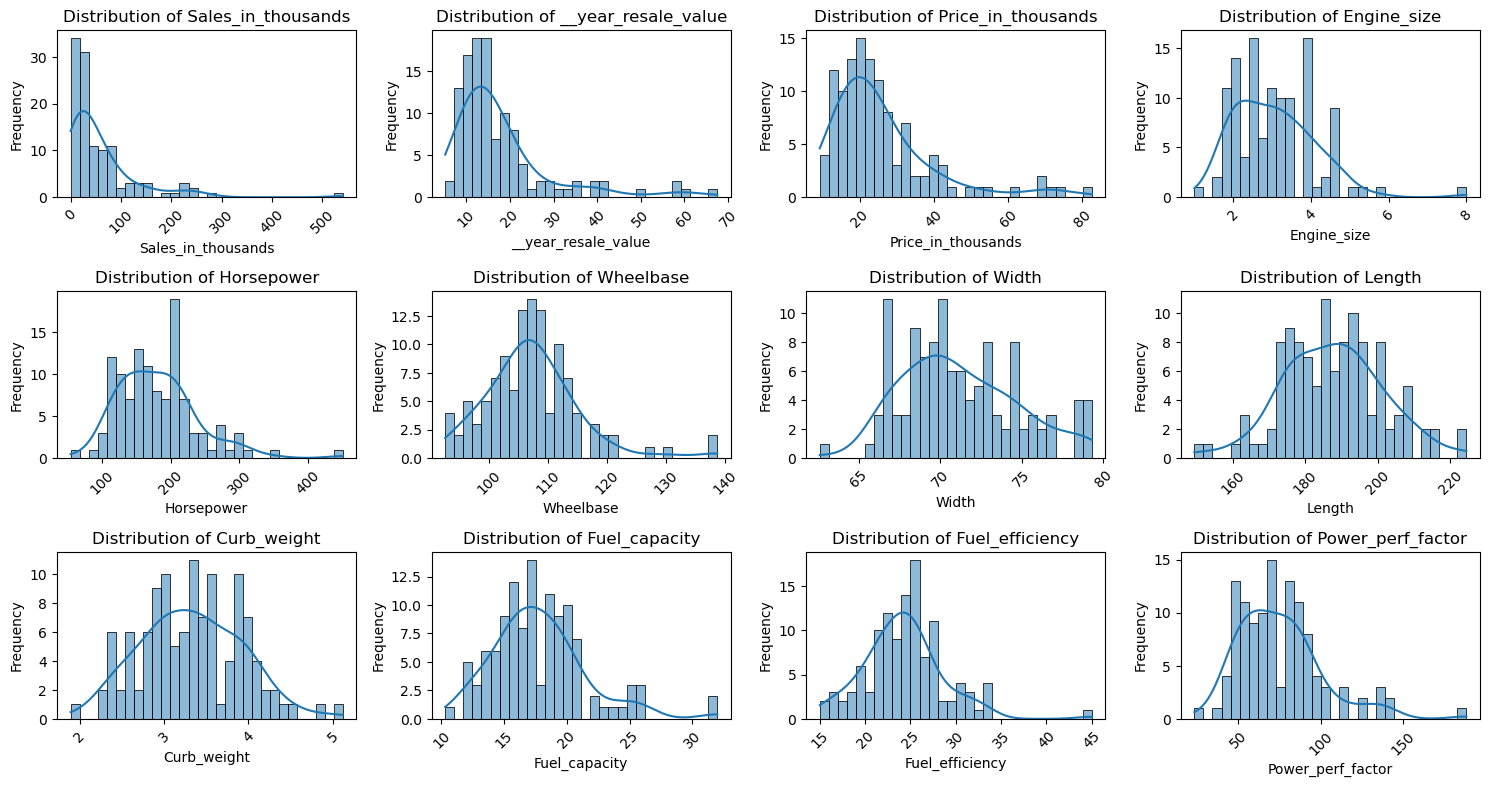

In [14]:
plt.figure(figsize = (15, 10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4,4 , i+1)
    sns.histplot(df[column], bins = 30, kde = True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [15]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

## Normalized Distribution (Gaussian)

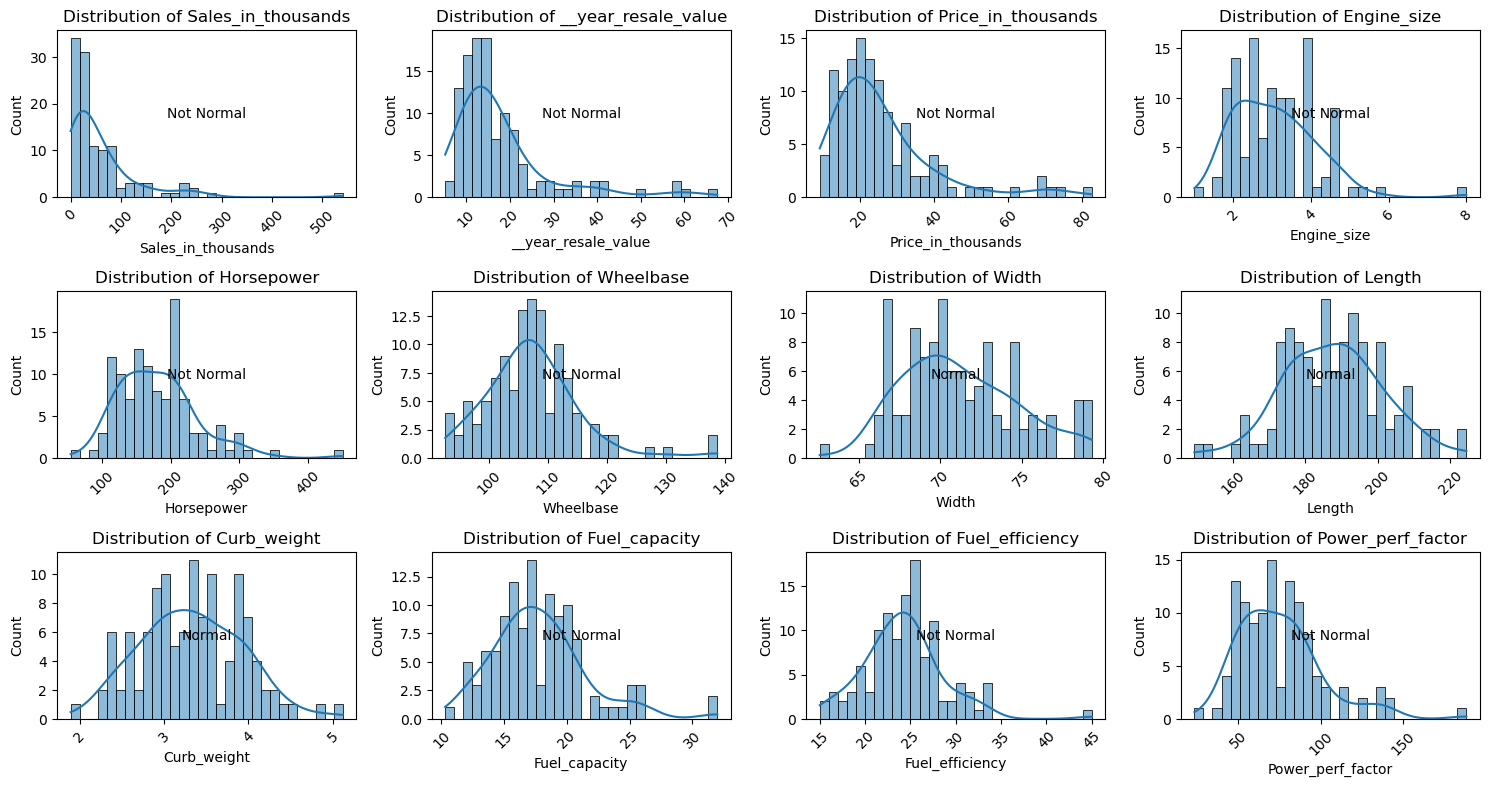

In [16]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[column], bins = 30, kde = True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    k2,p = stats.normaltest(df[column])
    if p < 0.05:
        plt.text(0.5,0.5, 'Not Normal', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5,0.5, 'Normal', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

## Skewed Distribution (negative and positive)


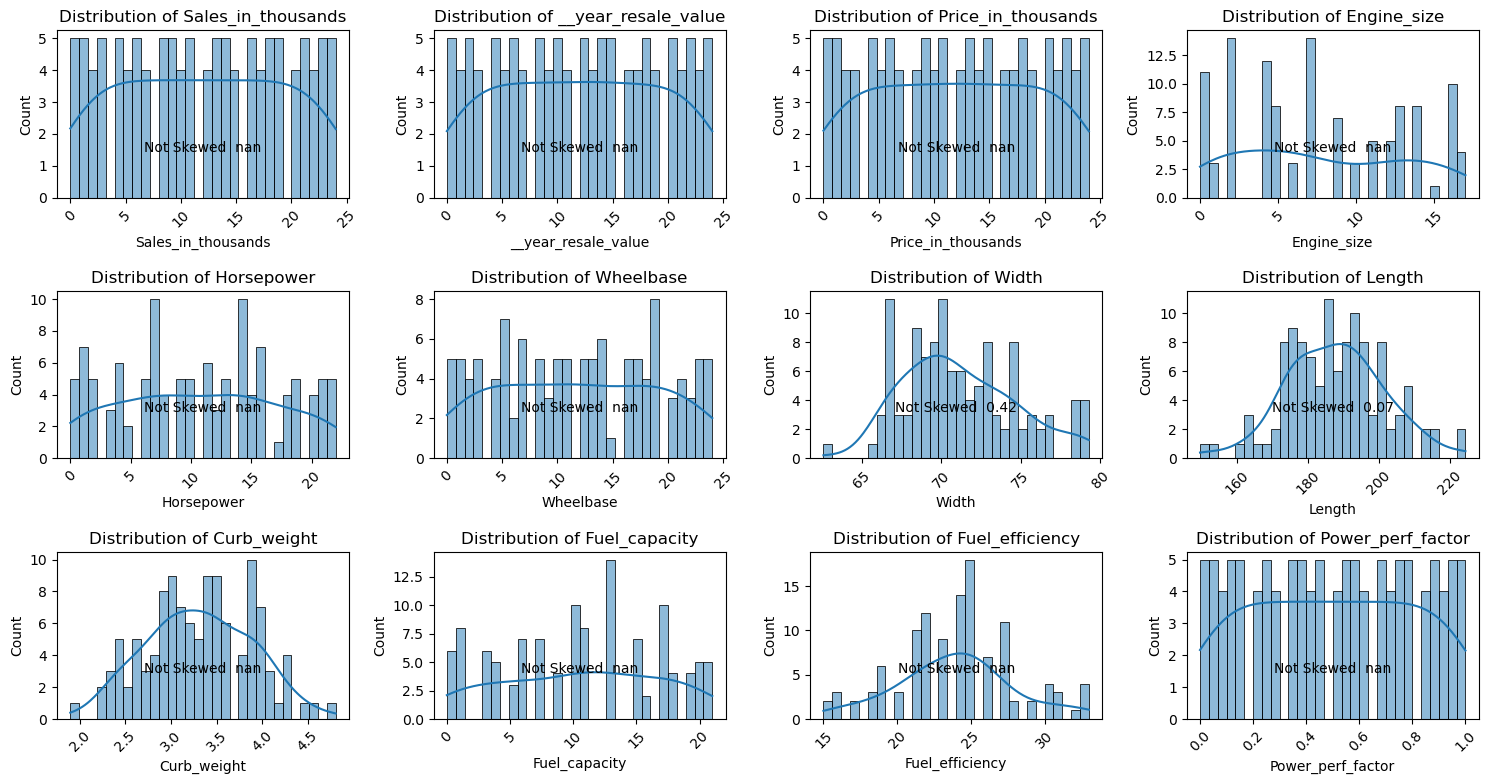

In [38]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    skewness = stats.skew(df[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5,0.3, f'Skewed {skewness: .2f}', horizontalalignment = 'center', verticalalignment = 'center',
                transform=plt.gca().transAxes)
    else:
        plt.text(0.5,0.3, f'Not Skewed {skewness: .2f}', horizontalalignment = 'center', verticalalignment = 'center',
                transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

## Outliers

Plot Boxplot

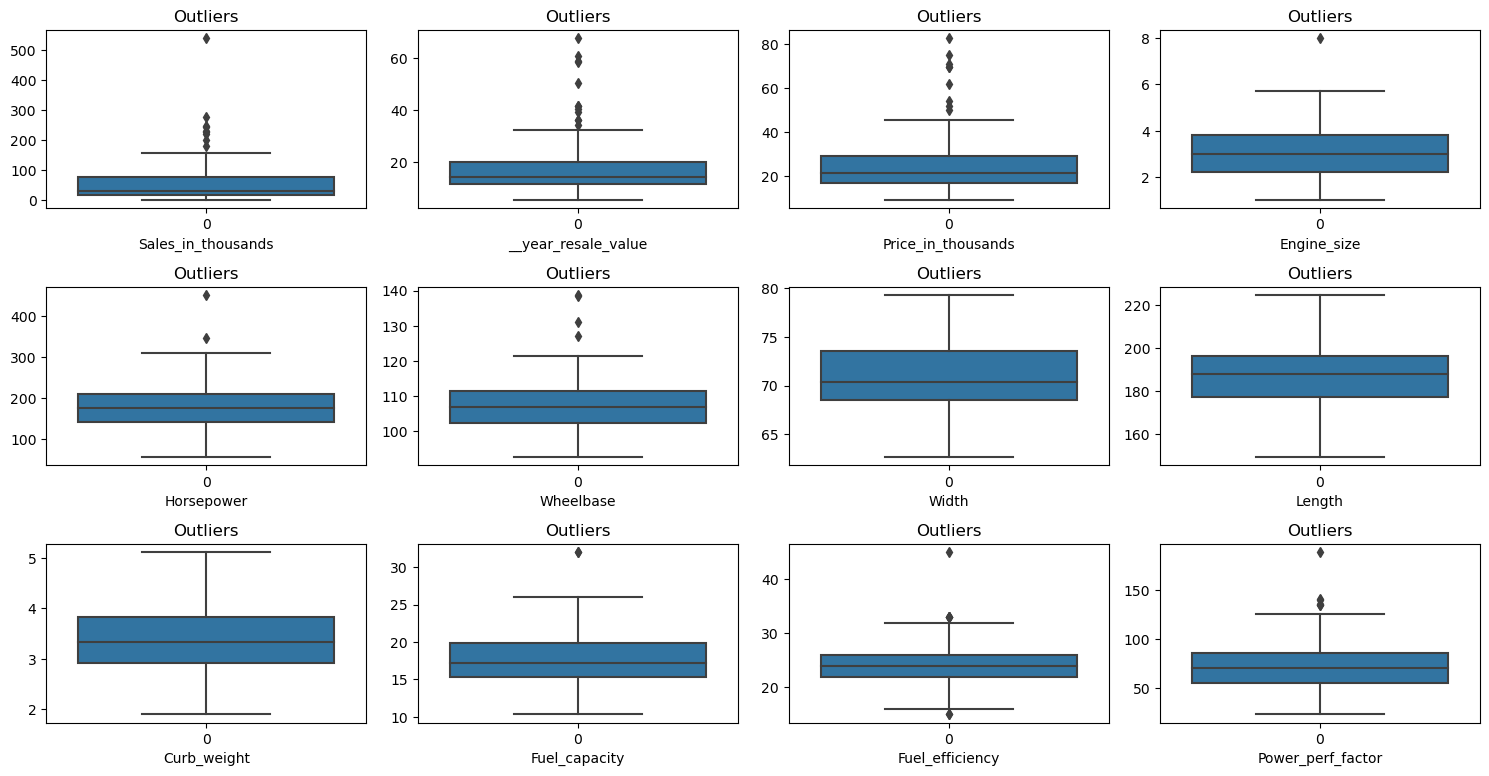

In [17]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[column])
    plt.title('Outliers')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

## Z-score

Detect Outliers using Z-Score. (Set threshold =3)

In [18]:
def detect_outliers_using_z_score(df, threshold=3):
    z_score = (numerical_cols-numerical_cols.mean())/numerical_cols.std()
    outliers = np.abs((z_score)>threshold).any(axis=1)
    return outliers

In [19]:
# z_score = (numerical_cols-numerical_cols.mean())/numerical_cols.std()
# outliers = np.abs((z_score)>3).any(axis=1)

## Remove outliers

In [20]:
def remove_outliers(data_column, threshold = 3):
    z_score = zscore(data_column)
    filtered_data = data_column[np.abs(z_score)<=threshold]
    return filtered_data

In [21]:
for column in numerical_cols:
    df[column] = remove_outliers(df[column])

## Distribution Check

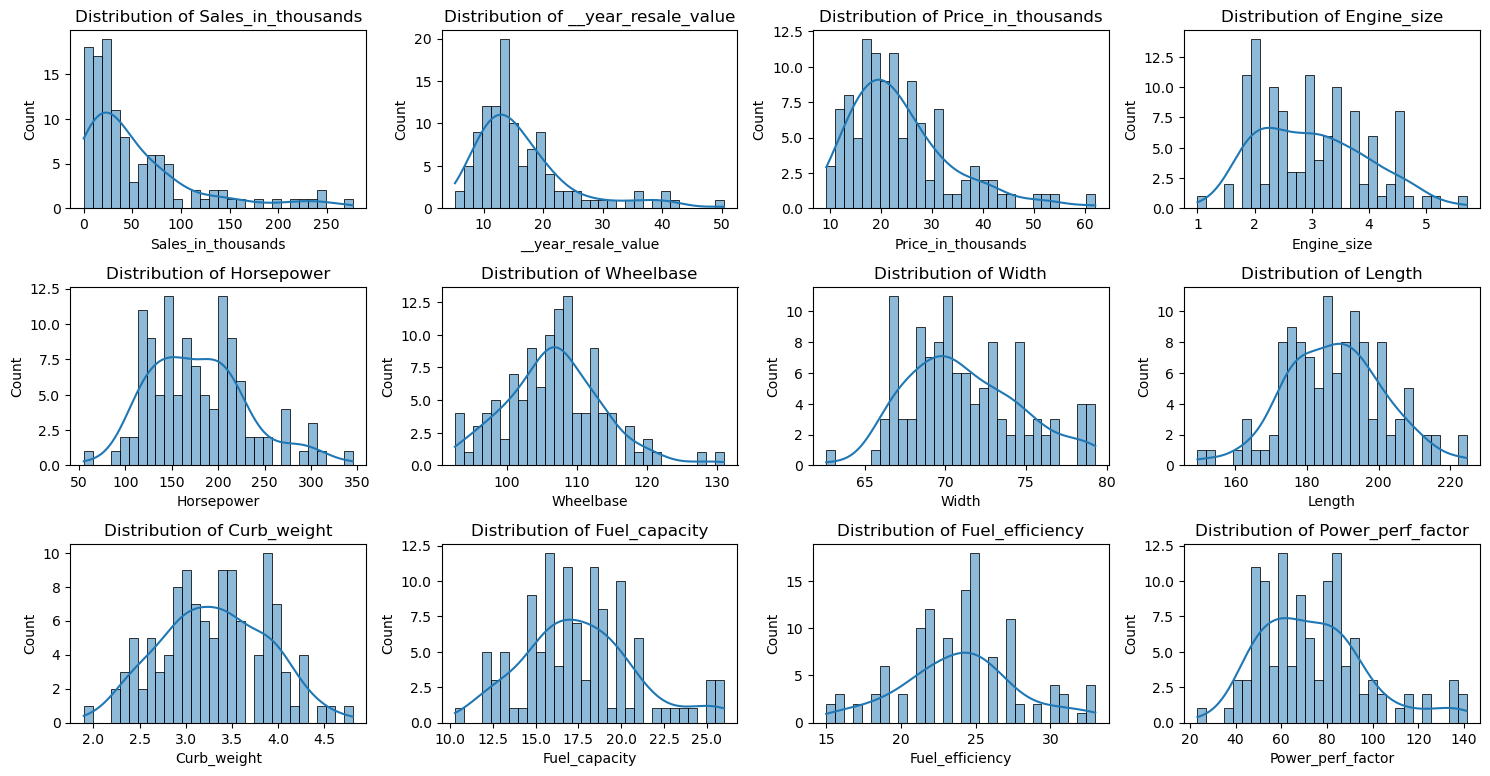

In [22]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [23]:
df.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object

#### Use binning technique to remove Skewness 

In [28]:
num_bins = 25
df['Sales_in_thousands'] = pd.qcut(df['Sales_in_thousands'], num_bins, labels = False, duplicates='drop')
df['__year_resale_value'] = pd.qcut(df['__year_resale_value'], num_bins, labels = False, duplicates='drop')
df['Price_in_thousands'] = pd.qcut(df['Price_in_thousands'], num_bins, labels = False, duplicates='drop')
df['Engine_size'] = pd.qcut(df['Engine_size'], num_bins, labels = False, duplicates='drop')
df['Horsepower'] = pd.qcut(df['Horsepower'], num_bins, labels = False, duplicates='drop')
df['Wheelbase'] = pd.qcut(df['Wheelbase'], num_bins, labels = False, duplicates='drop')
df['Fuel_capacity'] = pd.qcut(df['Fuel_capacity'], num_bins, labels = False, duplicates='drop')
df['Power_perf_factor'] = pd.qcut(df['Power_perf_factor'], num_bins, labels = False, duplicates='drop')

## Distribution check
To confirm if skewness is removed or not

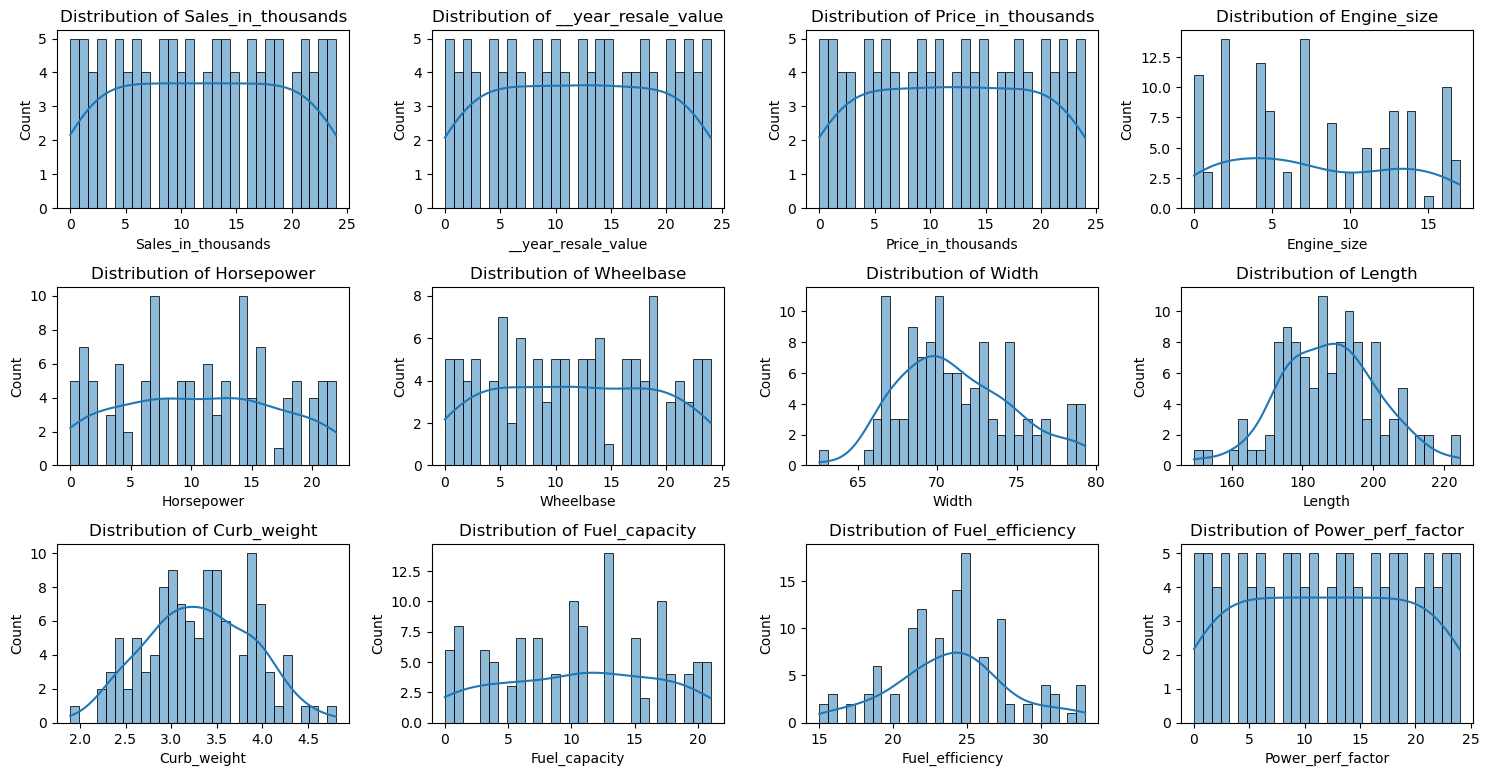

In [29]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### Standardization and Normalization

Apply standardization and normalization on the columns

## Standardization

In [30]:
standardscaler = StandardScaler()

In [32]:
cols = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower', 
        'Wheelbase', 'Fuel_capacity', 'Power_perf_factor']
for col in cols:
    df[column] = standardscaler.fit_transform(df[[column]])

## Normalization

In [33]:
normaliztion = MinMaxScaler()

In [34]:
cols_ = ['Width', 'Length', 'Curb_Weight', 'Fuel_capacity','Fuel_efficiency', 'Power_perf_factor']
for col in cols_:
    df[column] = normaliztion.fit_transform(df[[column]])

## Distribution check

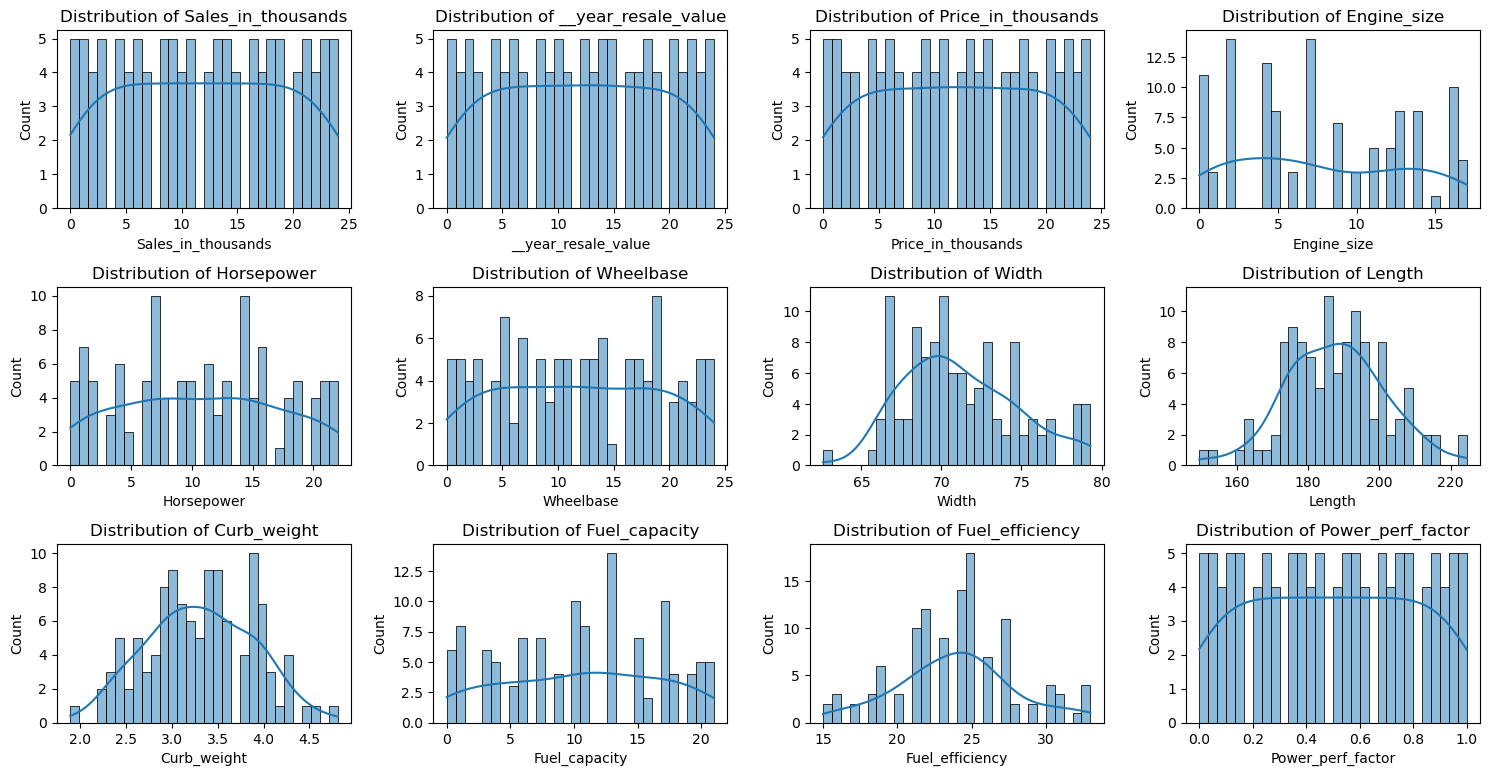

In [35]:
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## The END!